# Introduction

This data consists of the Bike Share Trip in Los Angeles. From this data we are going to perform some analysis about the time of day people use the bikes most. We are also going to look at the top 5 Stations and analyze their Rush Hour Trend. Enjoy the Analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

Let us take a look at the data

In [2]:
bike=pd.read_csv('metro-bike-share-trip-data.csv')
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Data Analysis

In [3]:
bike.isnull().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

Let us drop all the columns mentioning latitudes and longitudes

In [4]:
bike.drop(['Starting Station Latitude','Starting Station Longitude','Ending Station Latitude','Ending Station Longitude','Starting Lat-Long','Ending Lat-Long'],axis=1,inplace=True)
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,3000.0,5944.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,3000.0,6603.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,3000.0,5879.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,3000.0,6056.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,3000.0,6054.0,365.0,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,6437.0,NaN,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,3000.0,5923.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,3000.0,5810.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,3000.0,5951.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,3000.0,6492.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN


So all the Latitudes and Longitudes are gone. Now lets remove those rows(or trips) which has no Starting Station ID and Ending Station ID. It won't be a problem because we are going to remove just 96 rows out of 132000.

In [5]:
bike.drop(bike[bike['Starting Station ID'].isnull() | bike['Ending Station ID'].isnull()].index,inplace=True,axis=0)

In [6]:
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,3000.0,5944.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,3000.0,5879.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,3000.0,6056.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,3000.0,6054.0,365.0,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,3000.0,5923.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,3000.0,5810.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,3000.0,5951.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,3000.0,6492.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN
10,19858915,56100,2017-02-11T16:59:00.000,2017-02-12T08:34:00.000,3036.0,3000.0,6357.0,NaN,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN
11,19403230,480,2017-02-05T09:43:00.000,2017-02-05T09:51:00.000,3064.0,3000.0,6478.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bike['Start Time']=pd.to_datetime(bike['Start Time'])
bike['End Time']=pd.to_datetime(bike['End Time'])
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19 17:05:00,2017-01-19 21:16:00,3031.0,3000.0,5944.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18 10:15:00,2017-02-20 15:20:00,3026.0,3000.0,5879.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27 12:26:00,2017-02-27 17:40:00,3023.0,3000.0,6056.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27 20:26:00,2017-03-01 09:49:00,3008.0,3000.0,6054.0,365.0,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10 17:38:00,2017-03-10 21:44:00,3065.0,3000.0,5923.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17 19:20:00,2017-03-18 17:17:00,3063.0,3000.0,5810.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26 12:18:00,2017-02-27 12:36:00,3062.0,3000.0,5951.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23 18:48:00,2017-01-23 18:58:00,3082.0,3000.0,6492.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN
10,19858915,56100,2017-02-11 16:59:00,2017-02-12 08:34:00,3036.0,3000.0,6357.0,NaN,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN
11,19403230,480,2017-02-05 09:43:00,2017-02-05 09:51:00,3064.0,3000.0,6478.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN


Lets sort the dataframe with respect to Start Time 

In [8]:
bike.sort_values('Start Time',inplace=True)

In [9]:
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
123343,1912818,180,2016-07-07 04:17:00,2016-07-07 04:20:00,3014.0,3014.0,6281.0,30.0,Round Trip,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0
101945,1919661,1980,2016-07-07 06:00:00,2016-07-07 06:33:00,3014.0,3014.0,6281.0,30.0,Round Trip,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0
90791,1933383,300,2016-07-07 10:32:00,2016-07-07 10:37:00,3016.0,3016.0,5861.0,365.0,Round Trip,Flex Pass,76.0,9.0,22728.0,NaN,1502.0,543.0
124706,1944197,10860,2016-07-07 10:37:00,2016-07-07 13:38:00,3016.0,3016.0,5861.0,365.0,Round Trip,Flex Pass,76.0,9.0,22728.0,NaN,1502.0,543.0
78401,1940317,420,2016-07-07 12:51:00,2016-07-07 12:58:00,3032.0,3032.0,6674.0,0.0,Round Trip,Walk-up,76.0,9.0,23078.0,NaN,733.0,546.0
111762,1944075,780,2016-07-07 12:51:00,2016-07-07 13:04:00,3021.0,3054.0,6717.0,30.0,One Way,Monthly Pass,28.0,9.0,23074.0,NaN,1287.0,533.0
83390,1944073,600,2016-07-07 12:54:00,2016-07-07 13:04:00,3022.0,3014.0,5721.0,30.0,One Way,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0
99111,1944067,600,2016-07-07 12:59:00,2016-07-07 13:09:00,3076.0,3005.0,5957.0,365.0,One Way,Flex Pass,76.0,9.0,23075.0,NaN,1050.0,546.0
108985,1944062,2880,2016-07-07 13:01:00,2016-07-07 13:49:00,3031.0,3031.0,6137.0,365.0,Round Trip,Flex Pass,76.0,9.0,23075.0,NaN,683.0,541.0
104557,1944063,960,2016-07-07 13:01:00,2016-07-07 13:17:00,3031.0,3078.0,6351.0,30.0,One Way,Monthly Pass,76.0,9.0,23075.0,NaN,449.0,540.0


So the data is now prepared for analysis

# Analysis

In [10]:
# Which Station is the busiest?
# What is the normal duration for which people ride these bikes?
# Which Trip category dominates?(pie chart)
# Count Analysis on PassHolder Type.(pie chart)
# In which council districts are the bikes used most?
# When is the top 5 busiest stations busiest of all? At what time of day?

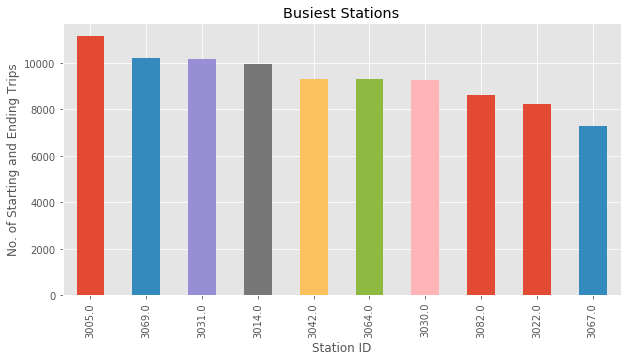

In [11]:
# Which station has most number of starting and ending trips?
(bike['Starting Station ID'].value_counts()+bike['Ending Station ID'].value_counts()).sort_values(ascending =False).head(10).plot(kind='bar',figsize=(10,5))
plt.title('Busiest Stations')
plt.ylabel('No. of Starting and Ending Trips')
plt.xlabel('Station ID')
plt.show()

Okay, Station with ID 3005 is the top station with total trips greater than 11000. Stations 3005, 3069 and 3031 are the top 3 stations and they have crossed the 10000 mark. 

In [12]:
bike[(bike['Starting Station ID']==3005) |(bike['Ending Station ID']==3005 )]

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
99111,1944067,600,2016-07-07 12:59:00,2016-07-07 13:09:00,3076.0,3005.0,5957.0,365.0,One Way,Flex Pass,76.0,9.0,23075.0,NaN,1050.0,546.0
110831,1944059,720,2016-07-07 13:03:00,2016-07-07 13:15:00,3063.0,3005.0,6110.0,30.0,One Way,Monthly Pass,76.0,9.0,23074.0,NaN,1050.0,546.0
102472,1944042,360,2016-07-07 13:10:00,2016-07-07 13:16:00,3005.0,3052.0,6295.0,365.0,One Way,Flex Pass,76.0,9.0,23078.0,54.0,847.0,567.0
132007,1981558,32700,2016-07-07 13:11:00,2016-07-07 22:16:00,3005.0,3021.0,6139.0,30.0,One Way,Monthly Pass,76.0,9.0,23078.0,NaN,466.0,533.0
119064,1960057,600,2016-07-07 17:26:00,2016-07-07 17:36:00,3063.0,3005.0,6123.0,30.0,One Way,Monthly Pass,76.0,9.0,23074.0,NaN,1050.0,546.0
87136,1960056,1140,2016-07-07 17:32:00,2016-07-07 17:51:00,3005.0,3040.0,5912.0,30.0,One Way,Monthly Pass,76.0,9.0,23078.0,54.0,1047.0,564.0
107443,1960055,300,2016-07-07 17:33:00,2016-07-07 17:38:00,3075.0,3005.0,6674.0,365.0,One Way,Flex Pass,76.0,9.0,23076.0,NaN,1050.0,546.0
79571,1960053,720,2016-07-07 17:37:00,2016-07-07 17:49:00,3030.0,3005.0,5927.0,30.0,One Way,Monthly Pass,76.0,9.0,22728.0,NaN,1050.0,546.0
89344,1989441,24420,2016-07-07 17:41:00,2016-07-08 00:28:00,3005.0,3030.0,6060.0,30.0,One Way,Monthly Pass,76.0,9.0,23078.0,NaN,1502.0,543.0
131641,1964222,300,2016-07-07 18:09:00,2016-07-07 18:14:00,3040.0,3005.0,5816.0,30.0,One Way,Monthly Pass,76.0,11.0,23078.0,NaN,1050.0,546.0


These are the trips of the top Station 3005.

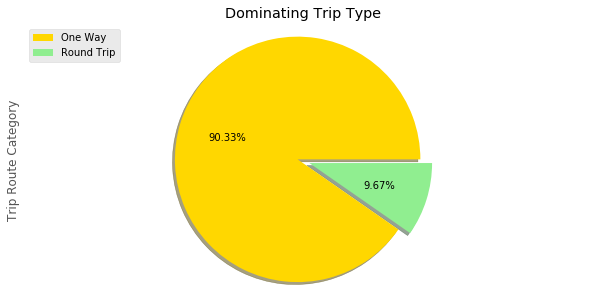

In [20]:
# Which Trip category dominates?
bike['Trip Route Category'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',shadow=True,labels=None,colors=['gold','lightgreen'],explode=[0,0.1])
plt.legend(labels=bike['Trip Route Category'].value_counts().index,loc='upper left')
plt.axis('equal')
plt.title('Dominating Trip Type')
plt.show()

No way Round trip can ever overtake One Way trip. Well, its self explanatory why the number of one way trips are greater.

In [14]:
# What is the normal duration for which people ride these bikes?
binwidth=(max(bike['Duration'])-min(bike['Duration']))/6
bins=np.arange(min(bike['Duration']),max(bike['Duration']),binwidth)
bins

array([6.000e+01, 1.445e+04, 2.884e+04, 4.323e+04, 5.762e+04, 7.201e+04])

In [15]:
bike['Duration Category']=pd.cut(bike['Duration'],bins,labels=['very low','low','medium','high','very high'],include_lowest=True)

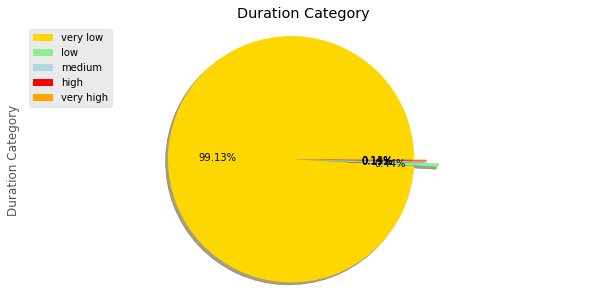

In [16]:
bike['Duration Category'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',labels=None,shadow=True,colors=['gold','lightgreen','lightblue','red','orange'],explode=[0.1,0.1,0,0,0])
plt.axis('equal')
plt.legend(labels=bike['Duration Category'].value_counts().index,loc='upper left')
plt.title('Duration Category')
plt.show()

Woh! People definitely like low duration ride. It's a bit expected value as no one wants a bike ride of two hours.

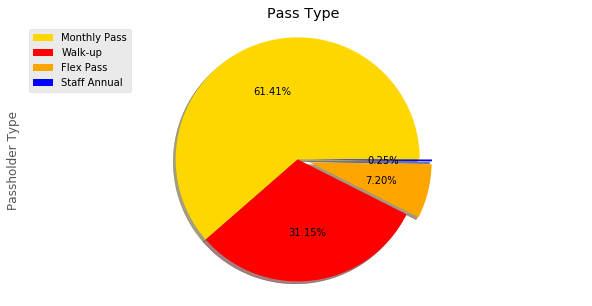

In [17]:
# Count analysis on Passholder type
bike['Passholder Type'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',shadow=True,labels=None,colors=['gold','red','orange','blue'],explode=[0,0,0.1,0.1])
plt.legend(labels=bike['Passholder Type'].value_counts().index,loc='upper left')
plt.axis('equal')
plt.title('Pass Type')
plt.show()

People like to use Monthly Pass greatly. Of course, it saves payment time. But People do use Walk Up pass.

In [18]:
bike['Hour']=bike['Start Time'].dt.hour

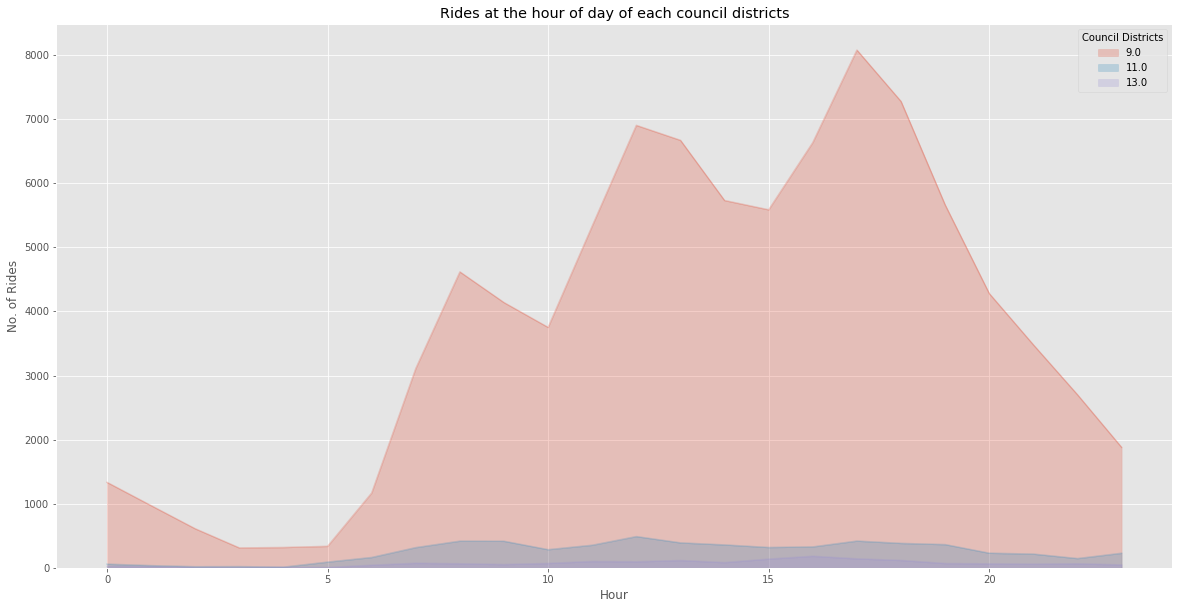

In [19]:
# In which council districts are the bikes used most?
pivot=bike.groupby(['Hour','Council Districts'],as_index=False)['Passholder Type'].agg('count').pivot_table(index='Hour',columns='Council Districts',values='Passholder Type')
pivot.plot(kind='area',stacked=False,alpha=0.25,figsize=(20,10))
plt.title('Rides at the hour of day of each council districts')
plt.ylabel('No. of Rides')
plt.show()

Clearly, Council District 9 has the most number of rides. We can say the system works on this districts. This district is the backbone of the system. Well, People start using these bikes from 5 am. The numbers start rising greatly till 9 am (RUSH HOUR)but drops slightly till 10 am. After that it increases rapidly till 12 pm. The numbers decrease during the period (1pm-3pm). The numbers start rising again till 5 pm after which it dereases linearly. So the prime time of the people using bikes in these districts is during the Rush Hours(self explanatory).

In [29]:
# When is the top 5 busiest stations busiest of all? At what time of day?
top5=[3005,3069,3031,3014,3042]
bike['End Hour']=bike['End Time'].dt.hour
bike.rename(columns={'Hour':'Start Hour'},inplace=True)
bike

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Ending Station ID,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts,Duration Category,Start Hour,End Hour
123343,1912818,180,2016-07-07 04:17:00,2016-07-07 04:20:00,3014.0,3014.0,6281.0,30.0,Round Trip,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0,very low,4,4
101945,1919661,1980,2016-07-07 06:00:00,2016-07-07 06:33:00,3014.0,3014.0,6281.0,30.0,Round Trip,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0,very low,6,6
90791,1933383,300,2016-07-07 10:32:00,2016-07-07 10:37:00,3016.0,3016.0,5861.0,365.0,Round Trip,Flex Pass,76.0,9.0,22728.0,NaN,1502.0,543.0,very low,10,10
124706,1944197,10860,2016-07-07 10:37:00,2016-07-07 13:38:00,3016.0,3016.0,5861.0,365.0,Round Trip,Flex Pass,76.0,9.0,22728.0,NaN,1502.0,543.0,very low,10,13
78401,1940317,420,2016-07-07 12:51:00,2016-07-07 12:58:00,3032.0,3032.0,6674.0,0.0,Round Trip,Walk-up,76.0,9.0,23078.0,NaN,733.0,546.0,very low,12,12
111762,1944075,780,2016-07-07 12:51:00,2016-07-07 13:04:00,3021.0,3054.0,6717.0,30.0,One Way,Monthly Pass,28.0,9.0,23074.0,NaN,1287.0,533.0,very low,12,13
83390,1944073,600,2016-07-07 12:54:00,2016-07-07 13:04:00,3022.0,3014.0,5721.0,30.0,One Way,Monthly Pass,28.0,9.0,22728.0,27.0,1322.0,532.0,very low,12,13
99111,1944067,600,2016-07-07 12:59:00,2016-07-07 13:09:00,3076.0,3005.0,5957.0,365.0,One Way,Flex Pass,76.0,9.0,23075.0,NaN,1050.0,546.0,very low,12,13
108985,1944062,2880,2016-07-07 13:01:00,2016-07-07 13:49:00,3031.0,3031.0,6137.0,365.0,Round Trip,Flex Pass,76.0,9.0,23075.0,NaN,683.0,541.0,very low,13,13
104557,1944063,960,2016-07-07 13:01:00,2016-07-07 13:17:00,3031.0,3078.0,6351.0,30.0,One Way,Monthly Pass,76.0,9.0,23075.0,NaN,449.0,540.0,very low,13,13


In [37]:
start=bike[bike['Starting Station ID'].isin(top5)].groupby(['Start Hour','Starting Station ID'],as_index=False)['Passholder Type'].agg('count')

In [40]:
end=bike[bike['Ending Station ID'].isin(top5)].groupby(['End Hour','Ending Station ID'],as_index=False)['Passholder Type'].agg('count')

In [44]:
start.rename(columns={'Start Hour':'Hour','Starting Station ID':'Station ID','Passholder Type':'Rides'},inplace=True)
end.rename(columns={'End Hour':'Hour','Ending Station ID':'Station ID','Passholder Type':'Rides'},inplace=True)

In [47]:
Rides=start.append(end,ignore_index=True).groupby(['Hour','Station ID'],as_index=False)['Rides'].agg('sum')

In [53]:
pivot=Rides.pivot_table(index='Hour',columns='Station ID',values='Rides')

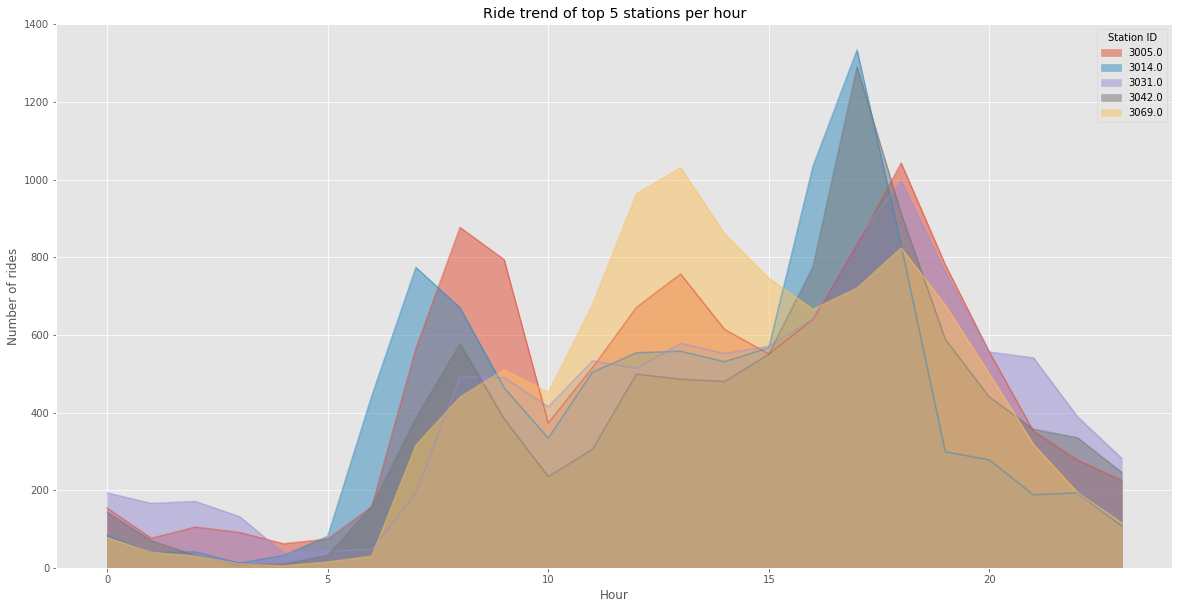

In [58]:
pivot.plot(kind='area',stacked=False,alpha=0.5,figsize=(20,10))
plt.title('Ride trend of top 5 stations per hour')
plt.ylabel('Number of rides')
plt.show()

What a graph! Looks like the busiest station 3005 does not become as busy as the busiest time of 3014. 
3069: The day starts at 5 am. The rides increrase considerably till 12 pm with a slight bounce in the graph. The rides decrease after 1 pm but increase considerably till 5pm after which the numbers decrease linearly.
3014: A very interesting station. At the start of their day, they see a very sharp increase in its number of rides till 7 am. After that the rides somewhat moderate out. The number of rides increase very highly during 3pm to 7pm. The increase is so surprising that it crosses 1300 mark which is greater than the busiest time of the busiest station which is just over 1000.
3031: Their day starts off slow and somewhat consistent after 8 am. The only time they get busy is during 6 pm, when people return.
3042: Another station with the peculiar characteristic of 3014. Its day starts off too with a sharp rise in its rides after 5 am and becomes maximum at 8 am. Then it decreases a bit. But then it increases to an extent that it matches the busiest time of 3014. 
3005: Their day starts too with a sharp increase in the numbers but soon decreases till 10am after which it increases till 12pm. The busiest time (i.e., 6 pm) cannot cross the busiest times of 3014 and 3042.
Every station has its own peculiarity. Turns out that though 3005 has the highest average number of rides but its busiest time is nothing as compared to the busiest times of 3014 and 3042.

# Conclusion

The backbone of the Bike Share System is dug in Council District 9. People do not seem to use bike share trips on districts other than District 9. People mainly use Monthly Pass with few of them using Walk Up pass. The normal duration for which people hire these bikes are for a very low duration and for only one way trip. They do use Round Trips but not as mush as one way trip. The Top 5 Stations are 3005,3014,3042,3069 and 3031. Among them, 3005 has the highest average rides. But this station does not get as crazy as 3014 and 3042 from 4pm to 7 pm. For an increase in profit, the management should increase the number of bikes in 3005,3014 and 3042 in the morning. They should increase bikes in stations 3005 and 3069 from 11 am to 1 pm. They must increase bikes in all the stations from 3 pm to 7 pm get an exponential increase in their profit.  
I hope you have acquired many useful informations from this analysis which may help you in future. 

# Thank you